In [ ]:
#importing and segmenting data
import pandas as pd
data = pd.read_csv("winequality-red.csv")
quality = pd.DataFrame(data["quality"])
cluster_data = data.drop("quality", inplace=False, axis=1)

In [ ]:
#run PCA pr MDS

from sklearn.decomposition import PCA
from sklearn.manifold import MDS

pca = PCA(n_components=2)
cluster_data = pca.fit_transform(cluster_data)

#mds = MDS(n_components=2)
#cluster_data = mds.fit_transform(cluster_data)



In [ ]:
#kmeans with raw data
from sklearn.cluster import KMeans, AgglomerativeClustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(cluster_data)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

In [ ]:
#evaluating kmeans
from sklearn import metrics
kmeans_rand_score = metrics.rand_score(quality["quality"], kmeans_labels)
kmeans_sil_score_e = metrics.silhouette_score(cluster_data, kmeans_labels, metric='euclidean')
kmeans_sil_score_c = metrics.silhouette_score(cluster_data, kmeans_labels, metric='cityblock')

In [ ]:
#hierarchical clustering on raw data
clustering = AgglomerativeClustering().fit(cluster_data)
cluster_labels = clustering.labels_

#clustering using average linkage
clustering_average = AgglomerativeClustering(linkage='average').fit(cluster_data)
cluster_average_labels = clustering_average.labels_

In [ ]:
#evaluating cluster
cluster_rand_score = metrics.rand_score(quality["quality"], cluster_labels)
cluster_sil_score_e = metrics.silhouette_score(cluster_data, cluster_labels, metric='euclidean')
cluster_sil_score_c = metrics.silhouette_score(cluster_data, cluster_labels, metric='cityblock')

cluster_average_rand_score = metrics.rand_score(quality["quality"], cluster_average_labels)
cluster_average_sil_score_e = metrics.silhouette_score(cluster_data, cluster_average_labels, metric='euclidean')
cluster_average_sil_score_c = metrics.silhouette_score(cluster_data, cluster_average_labels, metric='cityblock')


In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)

In [ ]:
####kmeans on scaled data
kmeans_scaled = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(cluster_data_scaled)
kmeans_scaled_labels = kmeans_scaled.labels_
kmeans_scaled_centers = kmeans_scaled.cluster_centers_

In [ ]:
#evaluating kmeans on scaled data
kmeans_scaled_rand_score = metrics.rand_score(quality["quality"], kmeans_scaled_labels)
kmeans_scaled_sil_score_e = metrics.silhouette_score(cluster_data_scaled, kmeans_scaled_labels, metric='euclidean')
kmeans_scaled_sil_score_c = metrics.silhouette_score(cluster_data_scaled, kmeans_scaled_labels, metric='cityblock')

In [ ]:
##hierarchical clustering on scaled data
clustering_scaled = AgglomerativeClustering().fit(cluster_data_scaled)
cluster_scaled_labels = clustering_scaled.labels_

#clustering on scaled data with average linkage
clustering_scaled_average = AgglomerativeClustering(linkage='average').fit(cluster_data_scaled)
cluster_scaled_average_labels = clustering_scaled_average.labels_

In [ ]:
#evaluating clustering on scaled data
cluster_scaled_rand_score = metrics.rand_score(quality["quality"], cluster_scaled_labels)
cluster_scaled_sil_score_e = metrics.silhouette_score(cluster_data_scaled, cluster_scaled_labels, metric='euclidean')
cluster_scaled_sil_score_c = metrics.silhouette_score(cluster_data_scaled, cluster_scaled_labels, metric='cityblock')

cluster_scaled_average_rand_score = metrics.rand_score(quality["quality"], cluster_scaled_average_labels)
cluster_scaled_average_sil_score_e = metrics.silhouette_score(cluster_data_scaled, cluster_scaled_average_labels, metric='euclidean')
cluster_scaled_average_sil_score_c = metrics.silhouette_score(cluster_data_scaled, cluster_scaled_average_labels, metric='cityblock')

In [ ]:
#evaluation results
print("Rand Index")
print("kmeans on raw data: ",round(kmeans_rand_score,2))
print("kmeans on scaled data: ",round(kmeans_scaled_rand_score,2))
print("hierarchical on raw data: ", round(cluster_rand_score,2))
print("hierarchical on raw data with average linkage: ", round(cluster_average_rand_score,2))
print("hierarchical on scaled data: ",round(cluster_scaled_rand_score,2))
print("hierarchical on scaled data with average linkage: ",round(cluster_scaled_average_rand_score,2))
print("Silhouette Coefficient")
print("kmeans on raw data (euclidean metric): ",round(kmeans_sil_score_e,2))
print("kmeans on scaled data (euclidean metric): ",round(kmeans_scaled_sil_score_e,2))
print("hierarchical on raw data (euclidean metric): ",round(cluster_sil_score_e,2))
print("hierarchical on raw data (euclidean metric, average linkage): ",round(cluster_average_sil_score_e,2))
print("hierarchical on scaled data (euclidean metric): ",round(cluster_scaled_sil_score_e,2))
print("hierarchical on scaled data (euclidean metric, average linkage): ",round(cluster_scaled_average_sil_score_e,2))
print("kmeans on raw data (cith block metric): ",round(kmeans_sil_score_c,2))
print("kmeans on scaled data (cith block metric): ",round(kmeans_scaled_sil_score_c,2))
print("hierarchical on raw data (cith block metric): ",round(cluster_sil_score_c,2))
print("hierarchical on raw data (cith block metric, average linkage): ",round(cluster_average_sil_score_c,2))
print("hierarchical on scaled data (cith block metric): ",round(cluster_scaled_sil_score_c,2))
print("hierarchical on scaled data (cith block metric, average linkage): ",round(cluster_scaled_average_sil_score_c,2))

Rand Index
kmeans on raw data:  0.54
kmeans on scaled data:  0.54
hierarchical on raw data:  0.48
hierarchical on raw data with average linkage:  0.36
hierarchical on scaled data:  0.43
hierarchical on scaled data with average linkage:  0.36
Silhouette Coefficient
kmeans on raw data (euclidean metric):  0.51
kmeans on scaled data (euclidean metric):  0.41
hierarchical on raw data (euclidean metric):  0.6
hierarchical on raw data (euclidean metric, average linkage):  0.83
hierarchical on scaled data (euclidean metric):  0.5
hierarchical on scaled data (euclidean metric, average linkage):  0.79
kmeans on raw data (cith block metric):  0.49
kmeans on scaled data (cith block metric):  0.4
hierarchical on raw data (cith block metric):  0.58
hierarchical on raw data (cith block metric, average linkage):  0.83
hierarchical on scaled data (cith block metric):  0.5
hierarchical on scaled data (cith block metric, average linkage):  0.8


In [ ]:
cluster_data

array([[-13.22490501,  -2.02389981],
       [ 22.03772361,   4.40832155],
       [  7.16267333,  -2.50146086],
       ...,
       [ -3.43135351,  14.27124349],
       [  1.13287834,  16.31616732],
       [ -3.8743766 ,   3.12634754]])

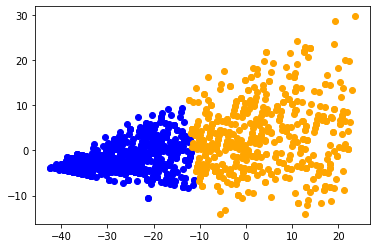

In [ ]:
#create plot and mark clusters with colour
import matplotlib.pyplot as plt
import numpy as np

filtered_label_1 = cluster_data[kmeans_labels== 1]
filtered_label_2 = cluster_data[kmeans_labels== 2]
plt.scatter(filtered_label_1[:,0], filtered_label_1[:,1], color='blue')
plt.scatter(filtered_label_2[:,0], filtered_label_2[:,1], color='orange')
plt.show()